In [1]:
import json
import sys
sys.path.append('/home/nbuser/library/')

import pandas as pd
import requests

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
house_prices = pd.read_csv('Dataset for Assignment.csv')
house_prices

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park
5,3,1.0,"14 Tainui Terrace Mangere Bridge, Auckland",100,1050000,-36.943929,174.780501,7007917,63,15,24,33,30,39,Mangere Bridge
6,3,1.0,"54 Kelmarna Avenue Ponsonby, Auckland",531,2525000,-36.849239,174.734451,7004908,33,12,18,12,15,9,Ponsonby
7,3,2.0,"39 Rawhiti Road One Tree Hill, Auckland",1024,1400000,-36.907700,174.796042,7005903,36,33,39,21,12,24,One Tree Hill
8,3,2.0,"17b Tawa Crescent Manurewa, Auckland",80,475000,-37.033322,174.898113,7009808,45,27,15,12,12,12,Manurewa
9,4,2.0,"39a Keegan Drive Massey, Auckland",204,660000,-36.846208,174.620794,7003826,30,27,36,15,24,12,Massey


In [4]:
house_prices.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park


In [5]:
house_prices['Land area'].str.extract('(\d+)')

,0
0,714
1,564
2,626
3,65
4,601
5,100
6,531
7,1024
8,80
9,204


In [6]:
house_prices.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park


In [7]:
house_prices['Land area'].str.extract('(\d+)').astype(float)

,0
0,714.0
1,564.0
2,626.0
3,65.0
4,601.0
5,100.0
6,531.0
7,1024.0
8,80.0
9,204.0


In [8]:
house_prices.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park


In [9]:
house_prices['Land area'] = house_prices['Land area'].str.extract('(\d+)').astype(float)

In [10]:
url = 'https://datafinder.stats.govt.nz/services/query/v1/vector.json'
params = {
        'key' : 'a5d35176865944c8b05ec563cbd4d5dd',
        'layter' : 104612,
        'x': 174.904069,
        'y': -37.012920
}
response = requests.get(url, params=params)

In [11]:
response

<Response [200]>

In [12]:
import time

def get_population(Longitude, Latitude):
    
    time.sleep(0.2)
    url = 'https://datafinder.stats.govt.nz/services/query/v1/vector.json'
    params = {
        'key' : 'a5d35176865944c8b05ec563cbd4d5dd',
        'layer' : 104612,
        'x': Longitude,
        'y': Latitude
    }
    response = requests.get(url, params=params)
        
    if 200 != response.status_code:
        return response.status_code
    
    population = response.json()['vectorQuery']['layers']['104612']['features'][0]['properties']['C18_CURPop']
    return population

In [13]:
get_population(174.77296943567325, -36.85231270879179)

15

In [ ]:
house_prices['Population'] = house_prices.apply(lambda row: get_population(row['Longitude'], row['Latitude']), axis = 1)

In [15]:
house_prices.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714.0,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174
1,5,3.0,"8 Corsica Way Karaka, Auckland",564.0,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626.0,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65.0,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601.0,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231


In [16]:
!curl https://www.fmhs.auckland.ac.nz/content/dam/uoa/fmhs/soph/epi/hgd/docs/MB2013_datazones.xlsx -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   360  100   360    0     0    196      0  0:00:01  0:00:01 --:--:--   196


In [17]:
excel_data_df=pd.read_excel('otago730393.xlsx')

In [18]:
!curl https://www.fmhs.auckland.ac.nz/content/dam/uoa/fmhs/soph/epi/hgd/docs/MB2013_datazones.xlsx -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   360  100   360    0     0    316      0  0:00:01  0:00:01 --:--:--   316


In [19]:
excel_data_df

,MB2018_code,NZDep2018,NZDep2018_Score,SA12018_code
0,100,10.0,1245.0,7000000
1,200,10.0,1245.0,7000000
2,300,10.0,1245.0,7000000
3,400,10.0,1245.0,7000001
4,501,NaN,NaN,7000002
5,502,10.0,1245.0,7000001
6,600,10.0,1245.0,7000001
7,700,10.0,1207.0,7000003
8,800,10.0,1207.0,7000003
9,900,9.0,1093.0,7000004


In [20]:
excel_data_df = excel_data_df [['SA12018_code', 'NZDep2018']]

In [21]:
excel_data_df.head()

,SA12018_code,NZDep2018
0,7000000,10.0
1,7000000,10.0
2,7000000,10.0
3,7000001,10.0
4,7000002,NaN


In [22]:
house_prices = house_prices.merge(excel_data_df, left_on='SA1', right_on='SA12018_code', suffixes=('_left', '_right'))

In [23]:
house_prices.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,SA12018_code,NZDep2018
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714.0,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,7009770,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564.0,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,7009991,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626.0,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,7009991,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65.0,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,7007871,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601.0,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,7008902,9.0


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
house_prices.shape

(1560, 18)

In [25]:
house_prices.isnull().values.any()

True

In [26]:
house_prices.isnull().sum()

Bedrooms        0
Bathrooms       2
Address         0
Land area       0
CV              0
Latitude        0
Longitude       0
SA1             0
0-19 years      0
20-29 years     0
30-39 years     0
40-49 years     0
50-59 years     0
60+ years       0
Suburbs         3
Population      0
SA12018_code    0
NZDep2018       0
dtype: int64

In [40]:
house_prices = house_prices.dropna()

In [41]:
house_prices.isnull().sum()

Bedrooms        0
Bathrooms       0
Address         0
Land area       0
CV              0
Latitude        0
Longitude       0
SA1             0
0-19 years      0
20-29 years     0
30-39 years     0
40-49 years     0
50-59 years     0
60+ years       0
Suburbs         0
Population      0
SA12018_code    0
NZDep2018       0
dtype: int64

how many missing values exist in the collection

In [42]:
house_prices.dtypes

Bedrooms          int64
Bathrooms       float64
Address          object
Land area       float64
CV                int64
Latitude        float64
Longitude       float64
SA1               int64
0-19 years        int64
20-29 years       int64
30-39 years       int64
40-49 years       int64
50-59 years       int64
60+ years         int64
Suburbs          object
Population        int64
SA12018_code      int64
NZDep2018       float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa52ec8668>,
      dtype=object)

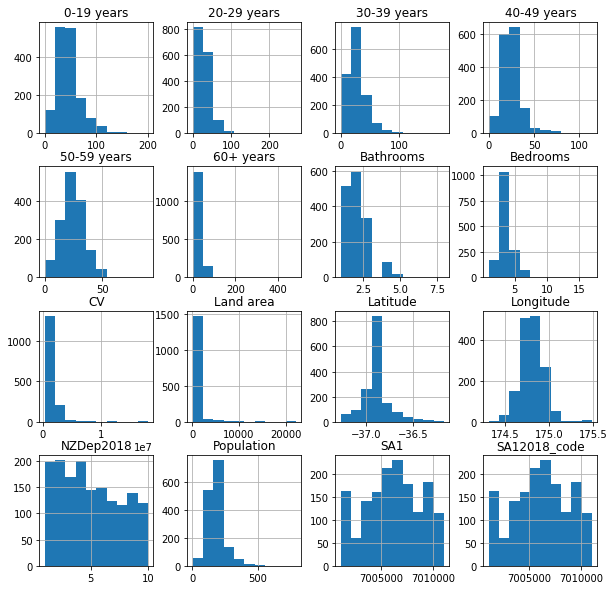

In [43]:
house_prices.hist(figsize=(10,10))

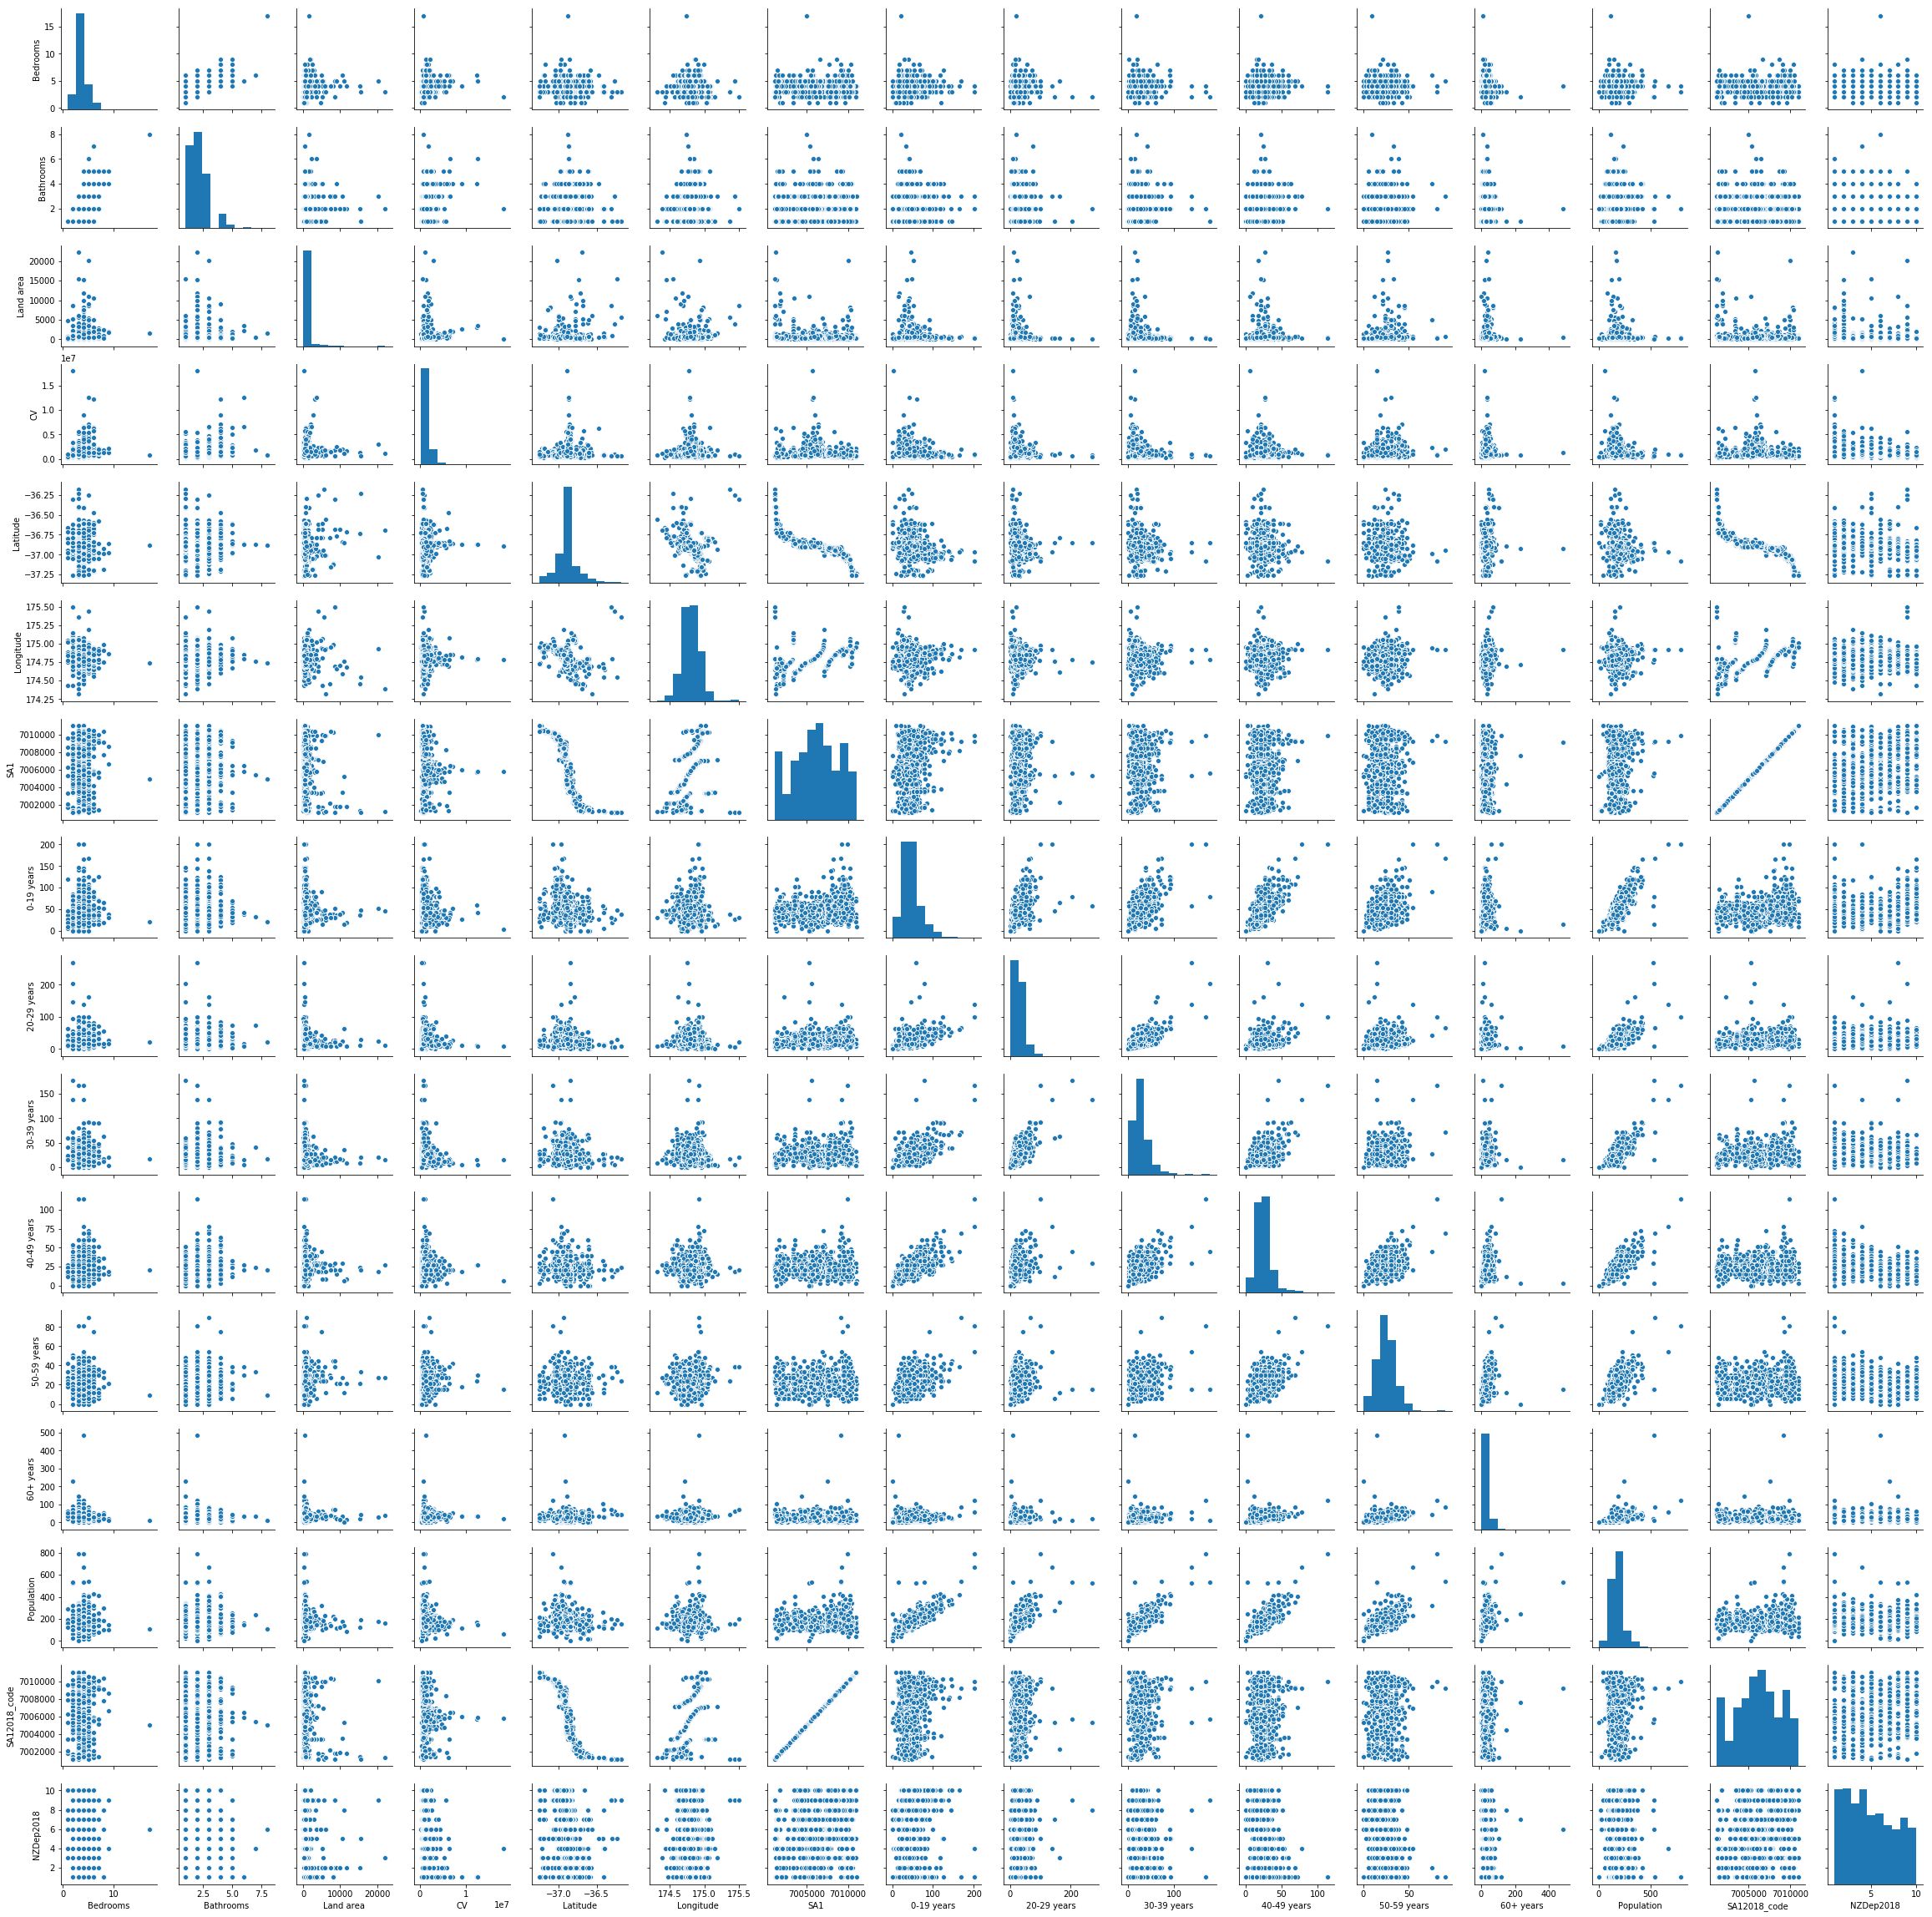

In [44]:
sns.pairplot(house_prices, height = 2.0)

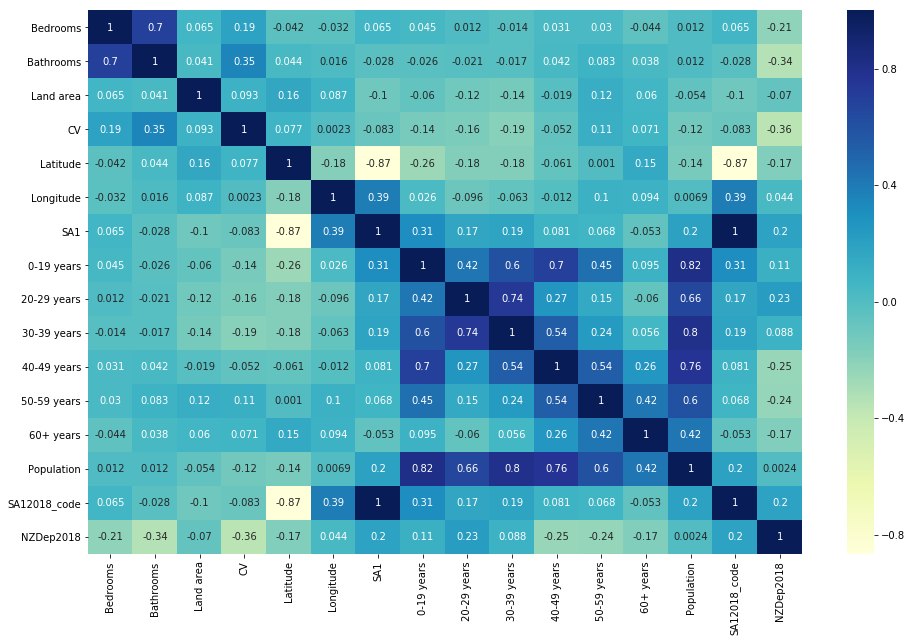

In [45]:
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = house_prices.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = "YlGnBu")
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


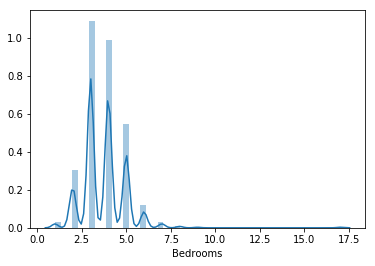

In [47]:
sns.distplot(house_prices['Bedrooms'])

In [61]:
from sklearn.model_selection import train_test_split
x= house_prices.drop(['Bedrooms', 'Address', 'Suburbs'], axis=1)
x.head()

,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Population,SA12018_code,NZDep2018
0,3.0,714.0,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,174,7009770,6.0
1,3.0,564.0,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,129,7009991,1.0
2,4.0,626.0,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,129,7009991,1.0
3,1.0,65.0,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,120,7007871,2.0
4,1.0,601.0,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,231,7008902,9.0


In [62]:
y = house_prices['Bedrooms']
y.head()

0    5
1    5
2    6
3    2
4    3
Name: Bedrooms, dtype: int64

In [63]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3, random_state=42)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
model.coef_

array([ 8.98369547e-01,  5.99495869e-05, -6.25891796e-08,  6.92310407e-01,
       -1.08778473e+00,  4.18870363e-05,  7.23264589e-03,  3.71984352e-03,
       -6.08417692e-03,  9.50256481e-04, -4.30693973e-03, -6.31305391e-04,
       -1.80418093e-03,  4.18870363e-05, -5.01802665e-03])

In [67]:
predicated = model.predict(test_x)

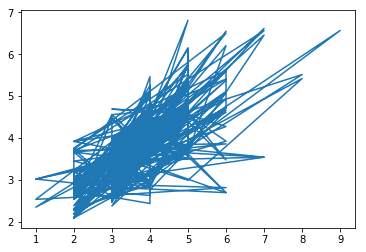

In [68]:
plt.plot(test_y, predicated)

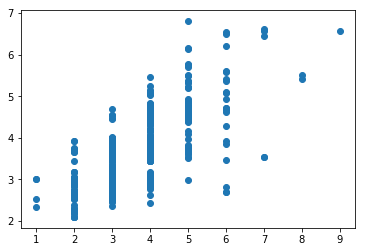

In [69]:
plt.scatter(test_y, predicated)

In [70]:
model.score(test_x, test_y)

0.4974400825233866

In [71]:
x= house_prices.drop(['0-19 years', 'Address', 'Suburbs'], axis=1)
x.head()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Population,SA12018_code,NZDep2018
0,5,3.0,714.0,960000,-37.012920,174.904069,7009770,27,24,21,24,21,174,7009770,6.0
1,5,3.0,564.0,1250000,-37.063672,174.922912,7009991,18,12,21,15,30,129,7009991,1.0
2,6,4.0,626.0,1250000,-37.063580,174.924044,7009991,18,12,21,15,30,129,7009991,1.0
3,2,1.0,65.0,740000,-36.912996,174.787425,7007871,6,21,21,12,15,120,7007871,2.0
4,3,1.0,601.0,630000,-36.979037,174.892612,7008902,27,33,30,21,33,231,7008902,9.0


In [72]:
y = house_prices['0-19 years']
y.head()

0    48
1    42
2    42
3    42
4    93
Name: 0-19 years, dtype: int64

In [73]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3, random_state=42)

In [74]:
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
model.coef_

array([ 2.42153025e-01, -4.56277782e-01, -1.49893762e-04,  1.28997832e-07,
        2.18310942e+00, -4.57027667e+00,  3.26530762e-04, -8.89698896e-01,
       -8.24585365e-01, -7.65326124e-01, -7.67259052e-01, -8.68101426e-01,
        8.90007429e-01,  3.26530749e-04,  1.26175820e-01])

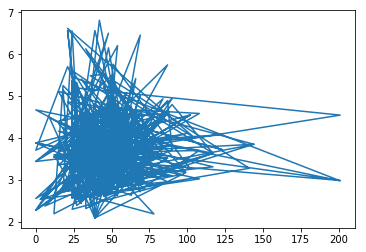

In [76]:
plt.plot(test_y, predicated)

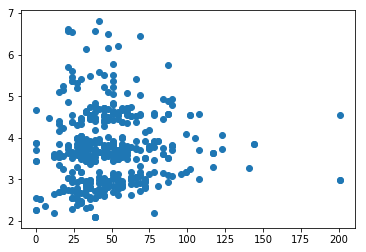

In [77]:
plt.scatter(test_y, predicated)

In [78]:
model.score(test_x, test_y)

0.9641184263062311

In [81]:
x= house_prices.drop(['CV', '0-19 years', '20-29 years', '30-39 years', '40-49 years', '50-59 years', '60+ years', 'SA1', 'Address', 'Suburbs'], axis=1)
x.head()

,Bedrooms,Bathrooms,Land area,Latitude,Longitude,Population,SA12018_code,NZDep2018
0,5,3.0,714.0,-37.012920,174.904069,174,7009770,6.0
1,5,3.0,564.0,-37.063672,174.922912,129,7009991,1.0
2,6,4.0,626.0,-37.063580,174.924044,129,7009991,1.0
3,2,1.0,65.0,-36.912996,174.787425,120,7007871,2.0
4,3,1.0,601.0,-36.979037,174.892612,231,7008902,9.0


In [82]:
y = house_prices['CV']
y.head()

0     960000
1    1250000
2    1250000
3     740000
4     630000
Name: CV, dtype: int64

In [83]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3, random_state=42)

In [84]:
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
model.coef_

array([-6.01416611e+04,  3.50531529e+05,  6.04780131e+01, -5.58025603e+04,
        9.77519294e+04, -1.40414502e+03,  1.84544199e+00, -1.14257794e+05])

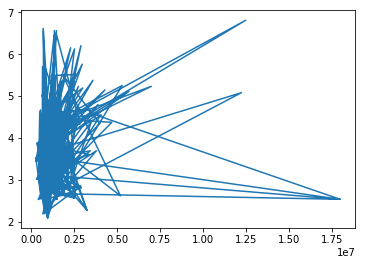

In [86]:
plt.plot(test_y, predicated)

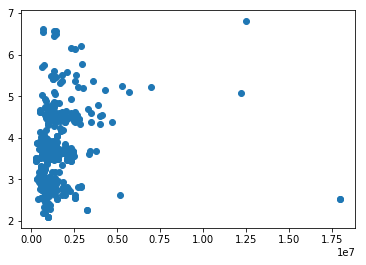

In [87]:
plt.scatter(test_y, predicated)

In [88]:
model.score(test_x, test_y)

0.1337558901074376